# MLPC '20 Project Notebook

In [43]:
from opera_dataset import OperaDataset
from evaluation_runner import EvaluationRunner

from scipy import stats
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import itertools

## 1 Load data

In [29]:
data = OperaDataset(max_files=11)

## 2 Analyse the data

### 2.1 How are features correlated with each other or over time?

In [5]:
data.correlation_matrix()

,mean_15.10.15_mfcc_0_40,mean_15.10.15_mfcc_1_40,mean_15.10.15_mfcc_2_40,mean_15.10.15_mfcc_3_40,mean_15.10.15_mfcc_4_40,mean_15.10.15_mfcc_5_40,mean_15.10.15_mfcc_6_40,mean_15.10.15_mfcc_7_40,mean_15.10.15_mfcc_8_40,mean_15.10.15_mfcc_9_40,...,range_15.10.15_cent_8_20,range_15.10.15_cent_9_20,range_15.10.15_cent_10_20,range_15.10.15_cent_11_20,range_15.10.15_cent_12_20,range_15.10.15_cent_13_20,range_15.10.15_cent_14_20,range_15.10.15_cent_15_20,range_15.10.15_cent_16_20,range_15.10.15_cent_17_20
mean_15.10.15_mfcc_0_40,1.000000,-0.381429,-0.577878,-0.024872,-0.041808,-0.154556,-0.167979,0.171817,-0.108205,-0.086297,...,-0.001526,-0.022592,-0.031937,-0.069259,-0.137658,-0.185308,-0.129924,-0.049955,-0.002713,0.025208
mean_15.10.15_mfcc_1_40,-0.381429,1.000000,0.468768,0.239331,0.220974,0.356007,0.127084,-0.071257,0.168445,-0.132924,...,-0.206222,-0.229613,-0.234404,-0.195659,-0.124416,-0.147634,-0.158608,-0.160052,-0.186714,-0.250227
mean_15.10.15_mfcc_2_40,-0.577878,0.468768,1.000000,0.486813,0.086417,0.449073,0.329393,-0.162463,0.211962,0.064690,...,-0.152574,-0.109349,-0.090807,-0.044761,0.031607,0.100668,0.136333,0.091278,0.016324,-0.089166
mean_15.10.15_mfcc_3_40,-0.024872,0.239331,0.486813,1.000000,0.307847,0.337560,0.250611,-0.145483,0.192414,0.105148,...,-0.103940,-0.079830,-0.119308,-0.173129,-0.170110,-0.122537,-0.063640,-0.096840,-0.161959,-0.214427
mean_15.10.15_mfcc_4_40,-0.041808,0.220974,0.086417,0.307847,1.000000,0.281196,-0.368039,0.273766,0.182716,-0.154020,...,0.337337,0.250365,0.096669,-0.058657,-0.101481,-0.028479,0.138857,0.209875,0.244310,0.221874
mean_15.10.15_mfcc_5_40,-0.154556,0.356007,0.449073,0.337560,0.281196,1.000000,0.214550,-0.028233,0.474126,-0.106622,...,-0.253759,-0.298602,-0.345301,-0.349432,-0.261666,-0.140914,0.037369,0.051005,-0.053278,-0.245667
mean_15.10.15_mfcc_6_40,-0.167979,0.127084,0.329393,0.250611,-0.368039,0.214550,1.000000,-0.137051,0.083214,0.465828,...,-0.375154,-0.298207,-0.155450,0.014074,0.150318,0.099502,-0.121081,-0.264779,-0.327037,-0.263406
mean_15.10.15_mfcc_7_40,0.171817,-0.071257,-0.162463,-0.145483,0.273766,-0.028233,-0.137051,1.000000,0.226473,-0.289182,...,0.140993,0.155317,0.174197,0.150997,0.024971,-0.086288,-0.008352,0.118260,0.214462,0.226872
mean_15.10.15_mfcc_8_40,-0.108205,0.168445,0.211962,0.192414,0.182716,0.474126,0.083214,0.226473,1.000000,0.202367,...,-0.018127,-0.067937,-0.185206,-0.250024,-0.270047,-0.176234,0.023747,0.050459,-0.037101,-0.209526
mean_15.10.15_mfcc_9_40,-0.086297,-0.132924,0.064690,0.105148,-0.154020,-0.106622,0.465828,-0.289182,0.202367,1.000000,...,0.073898,0.035041,-0.005326,0.054100,0.189790,0.233932,0.058561,-0.092010,-0.142958,-0.059721


### 2.2 Do any features seem redundant?

In [61]:
# TODO

### 2.3 Which features correlate with the labels?

In [10]:
corr_matrix = data.correlation_matrix('choral')
corr_matrix[abs(corr_matrix) > 0.5]

choral    1.0
Name: choral, dtype: float64

In [11]:
corr_matrix = data.correlation_matrix('female')
corr_matrix[abs(corr_matrix) > 0.5]

female                      1.000000
mean_15.10.15_cont_14_20    0.606839
mean_15.10.15_cent_13_20    0.553197
mean_15.10.15_cent_14_20    0.542334
mean_15.10.15_cont_15_20    0.526002
mean_15.10.15_mfcc_5_40    -0.537777
Name: female, dtype: float64

In [12]:
corr_matrix = data.correlation_matrix('male')
corr_matrix[abs(corr_matrix) > 0.5]

male                        1.000000
mean_15.10.15_cont_13_20    0.681365
mean_15.10.15_cent_11_20    0.530487
mean_15.10.15_cent_10_20    0.528084
mean_15.10.15_mfcc_7_40     0.521462
mean_15.10.15_flat_13_20   -0.500967
mean_15.10.15_cent_14_20   -0.553570
mean_15.10.15_cent_16_20   -0.593929
mean_15.10.15_mfcc_6_40    -0.596786
mean_15.10.15_cont_16_20   -0.601134
mean_15.10.15_cent_15_20   -0.706196
mean_15.10.15_cont_15_20   -0.726679
Name: male, dtype: float64

### 2.4 Are there any outliers (in terms of features, or recordings)?

In [3]:
z = np.abs(stats.zscore(data.features()))
rows, columns = np.where(z > 3)
np.unique(rows)

# TODO: maybe remove those instances

array([   0,    1,    2, ..., 9994, 9995, 9996])

In [ ]:
data

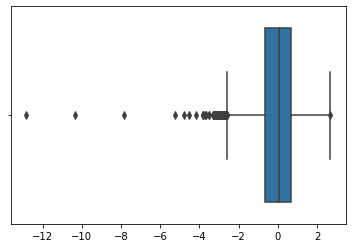

In [4]:
sns.boxplot(x=data.columns(data.feature_names[0]))

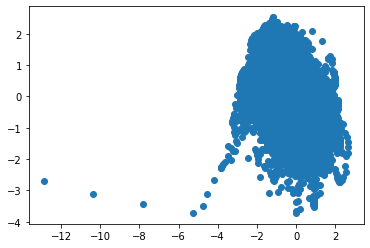

In [12]:
plt.scatter(data.columns(data.feature_names[0]), data.columns(data.feature_names[1]))

In [25]:
def pca(X, y, n_components, plot=True):
    pca = PCA(n_components=n_components)
    y_pca = pca.fit_transform(X)

    if plot:
        classes = list(set(y))

        colors = sns.color_palette(n_colors=len(classes)).as_hex()

        width = 14
        cols = 4
        rows = np.math.ceil(np.sum([i for i in range(n_components)]) / cols)
        fig, axs = plt.subplots(rows, cols, figsize=(width, rows * width / cols))

        for i, (pc_1, pc_2) in enumerate(itertools.combinations(range(n_components), 2)):
            for index, c in enumerate(classes):
                ax = axs[int(i / cols), int(i % cols)]
                ax.scatter(y_pca[y==c, pc_1], y_pca[y==c, pc_2], color=colors[index], label=c, s=3)

        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels)
        fig.suptitle('Downprojected data')

        plt.show()

    return pca

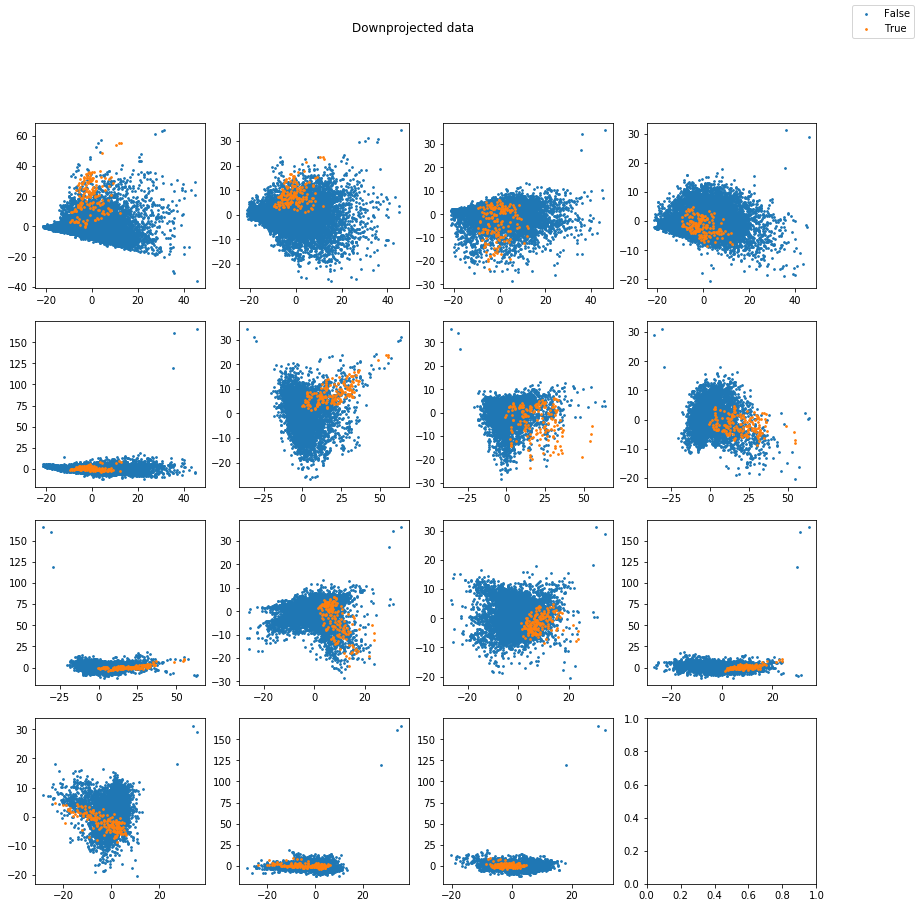

Explained variance: [0.15912577 0.25904034 0.31623473 0.34834801 0.37911606 0.40186678]


In [26]:
p = pca(data.features(), data.labels('choral').iloc[:, 0].values, 6)
print(f'Explained variance: {p.explained_variance_ratio_.cumsum()}')

### 2.5 Any other interesting observations?

In [65]:
# TODO

### 2.6 Optional: Any correspondence to metadata?

In [66]:
# TODO

### 2.7 Optional: What about multiple annotations?

In [67]:
# TODO

## 3 Train and evaluate classifiers
Perform systematic experiments, using cross-validation, with at least 4 different learning algorithms (suggestion: one from each major group: Support Vector Machines, Neural Networks, Nearest Neighbor Classifiers, Naive Bayes, Decision Trees, Generalized Linear Models, Linear and Quadratic Discriminant Analysis, etc.; perhaps also an “ensemble method” such as Random Forest). Focus on framewise classification accuracy as the evaluation criterion.

For each algorithm: perform a systematic evaluation of different parameter settings, for those parameters that control the algorithm’s overfitting behaviour. Analyse and document how the parameters affect the learned models, and whether overfitting occurs, and to what extent.

In [30]:
data.split()
folds_choral = data.generate_folds('choral')
folds_female = data.generate_folds('female')
folds_male = data.generate_folds('male')

Generating 5 folds out of data from 5 performances.


In [ ]:
runner = EvaluationRunner({'lr': LogisticRegression(), 'svc': SVC()})
runner.cross_validate(folds_choral, 3)

Evaluating lr


/home/paulg/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/paulg/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

Evaluating svc
